In [1]:
# Date: 15-03-2020
# Author: Redouane Lguensat

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from scipy.special import erf
%matplotlib inline

In [3]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


# Morocco

In [5]:
df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:,'3/2/20':] #'3/2/20'

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
163,1,1,1,2,2,2,2,2,3,5,...,96,115,143,170,225,275,345,402,479,556


#### draw the curves

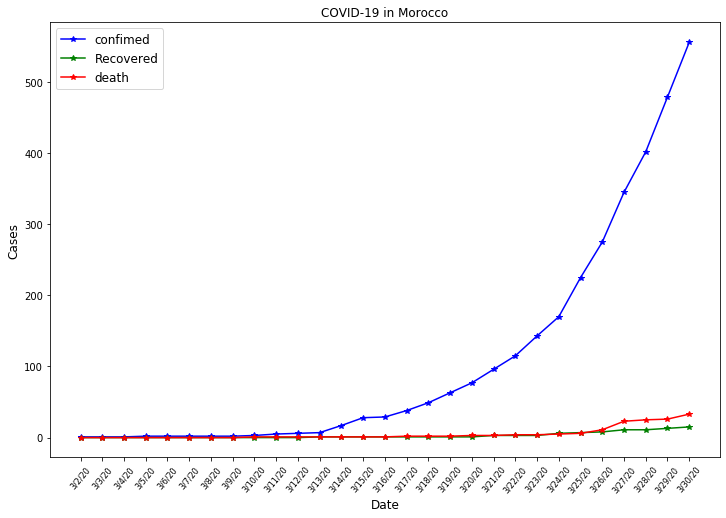

In [6]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[44:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='blue')
plt.plot(list(df_recovered)[44:],df_recovered[df_recovered['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='green')
plt.plot(list(df_deaths)[44:],df_deaths[df_deaths['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-', color='red')
plt.legend(['confimed','Recovered','death'],fontsize=12)
plt.title('COVID-19 in Morocco')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

# 7-day forecast of COVID-19 infections in Morocco

At this time, data is still scarce and not suitable for accurate modeling, these results are then highly uncertain for now.

#### Fit an exponential curve (worst case, not realistic)

population is finite thus an exponential model is not realistic but gives insights about the beggining of an infection

#### function to extend dates

In [7]:
from datetime import timedelta, datetime
## https://github.com/Lewuathe/COVID19-SIR/blob/master/solver.py
def extend_index(index, new_size):
    values = index.values
    current = datetime.strptime(index[-1], '%m/%d/%y')
    while len(values) < new_size:
        current = current + timedelta(days=1)
        values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
    return values

In [8]:
dataConfirmedMorocco = df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].iloc[0]
dataRecoveredMorocco = df_recovered[df_recovered['Country/Region']=='Morocco'].loc[:, '3/2/20':].iloc[0]
dataDeathMorocco = df_deaths[df_deaths['Country/Region']=='Morocco'].loc[:, '3/2/20':].iloc[0]

In [9]:
nbdays = (datetime.today() - datetime.strptime('3/2/20', '%m/%d/%y')).days + 1  #nbdays of available data from 3/2/20


#### curve fitting

In [10]:

U,V = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,
                np.arange(1,nbdays),
                dataConfirmedMorocco)

In [11]:
U, V

(array([ 2.58825251,  0.18682954, -9.23421865]),
 array([[ 8.85303626e-02, -1.20241795e-03, -5.91743954e-01],
        [-1.20241795e-03,  1.64393165e-05,  7.72879528e-03],
        [-5.91743954e-01,  7.72879528e-03,  6.90592756e+00]]))

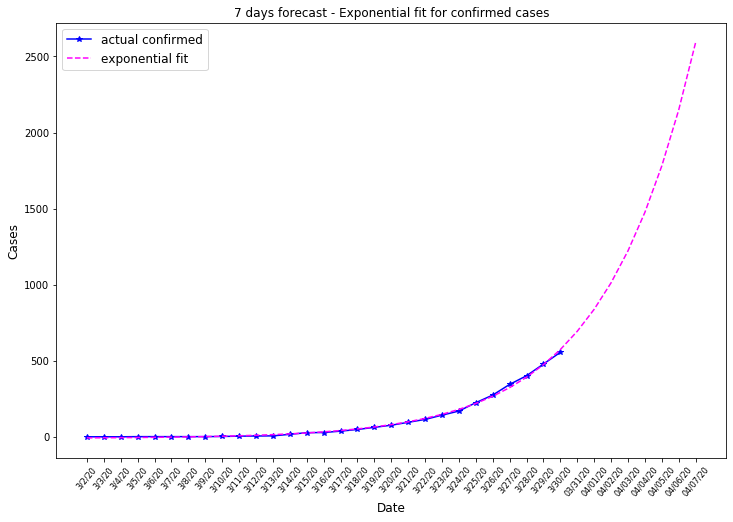

In [12]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[44:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='blue')
plt.plot(extend_index(dataConfirmedMorocco.index,nbdays+7),U[0]*np.exp(U[1]*np.arange(1,nbdays+8))+U[2], '--',color='magenta')
plt.legend(['actual confirmed','exponential fit'],fontsize=12)
plt.title('7 days forecast - Exponential fit for confirmed cases')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

#### prediction for the next 7 days

In [13]:
np.floor(U[0]*np.exp(U[1]*np.arange(nbdays,nbdays+7))+U[2])

array([ 694.,  838., 1012., 1222., 1475., 1780., 2148.])

### Fit a logisitic curve (also not very realistic)

This model is widely used for estimating the growth of a population and also to simply model infections

In [14]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(a*x+b)))

In [15]:
nbdays = (datetime.today() - datetime.strptime('3/2/20', '%m/%d/%y')).days + 1  #nbdays of available data from 3/2/20

U,V = curve_fit(logistic_model,
          np.arange(1,nbdays),
          dataConfirmedMorocco,
          p0=[2,-60,10000])#p0=[2,-60,1000]

In [16]:
U,V

(array([ 2.49740565e-01, -7.62409216e+00,  1.37564712e+03]),
 array([[ 3.50086237e-05, -2.94766533e-04, -6.09989075e-01],
        [-2.94766533e-04,  4.29440686e-03,  3.39910415e+00],
        [-6.09989075e-01,  3.39910415e+00,  1.23254497e+04]]))

#### !!!!!!!!!!!!!! data is not sufficient to find a good logistic fit... 

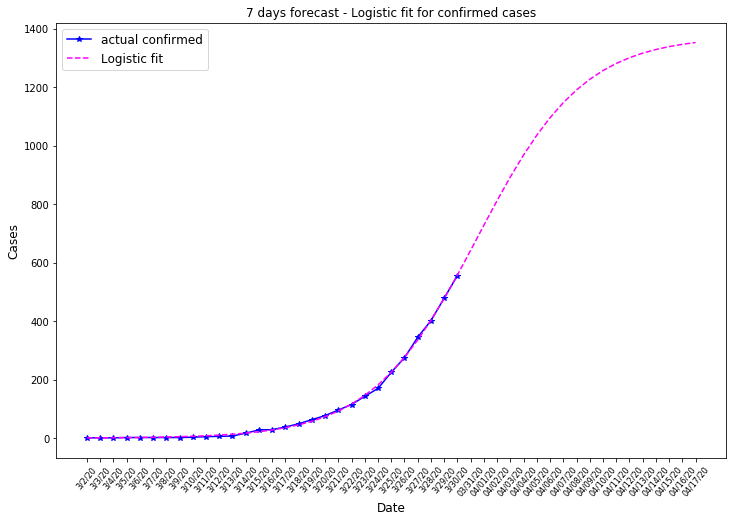

In [17]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[44:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '3/2/20':].values[0,:], '*-',color='blue')
plt.plot(extend_index(dataConfirmedMorocco.index,nbdays+17),U[2]/(1+np.exp(-(U[0]*np.arange(1,nbdays+18)+U[1]))), '--',color='magenta')
plt.legend(['actual confirmed','Logistic fit'],fontsize=12)
plt.title('7 days forecast - Logistic fit for confirmed cases')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

In [18]:
np.floor(U[2]/(1+np.exp(-(U[0]*np.arange(nbdays,nbdays+8)+U[1]))))

array([ 642.,  728.,  812.,  893.,  968., 1036., 1096., 1147.])

somewhat similar to the exp curve for now (it's just the beginning in Morocco...)

# !!!! SIR model !!!!

#### Realistic model known to epidemiologists, check the excellent video by 3blue1brown https://www.youtube.com/watch?v=gxAaO2rsdIs

### Now let's find the best $\beta$ and $\gamma$ for Morocco data

In [19]:
N=3e7

def loss(point, data, recovered, N, s_0, i_0, r_0):
    #https://github.com/Lewuathe/COVID19-SIR/blob/master/solver.py
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [20]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

data = dataConfirmedMorocco - dataRecoveredMorocco - dataDeathMorocco
###
s_0 = 3e7 
i_0 = 1
r_0 = 0
###
result = minimize(loss, [0.001, 0.001], args=(data.astype('float64'), dataRecoveredMorocco.astype('float64'), N, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0., 1), (0., 1)], options={'disp':10})#, bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
beta, gamma = result.x
print(beta,gamma,beta/gamma)

0.23268424760654483 0.006953693429721351 33.46196520715308


In [21]:
def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]

In [22]:
predict_range = nbdays + 150

new_index = extend_index(dataConfirmedMorocco.index, predict_range)
size = len(new_index)

predictMorocco = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

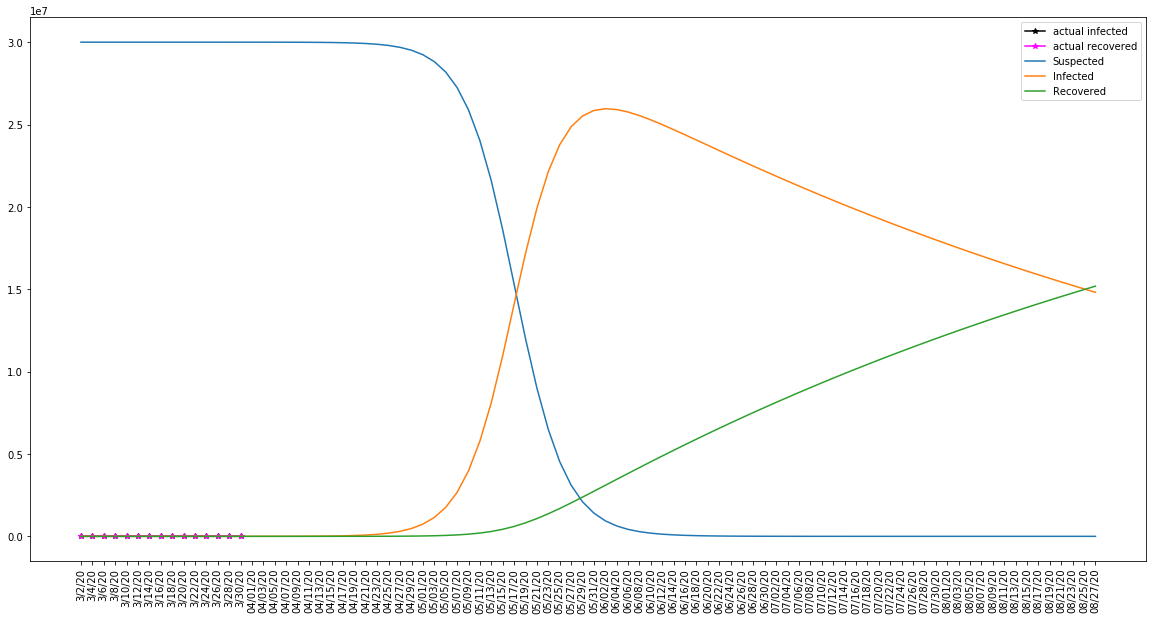

In [23]:
infected_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
recovered_actual = np.concatenate((dataRecoveredMorocco.values, [None] * (size - len(data.values))))

plt.figure(figsize=(20,10))
plt.plot(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.plot(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.plot(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.plot(new_index[::2], predictMorocco.y[1,::2], label='Infected')
plt.plot(new_index[::2], predictMorocco.y[2,::2], label='Recovered')
plt.xticks(rotation=90)
plt.legend()

#### same but log-scale

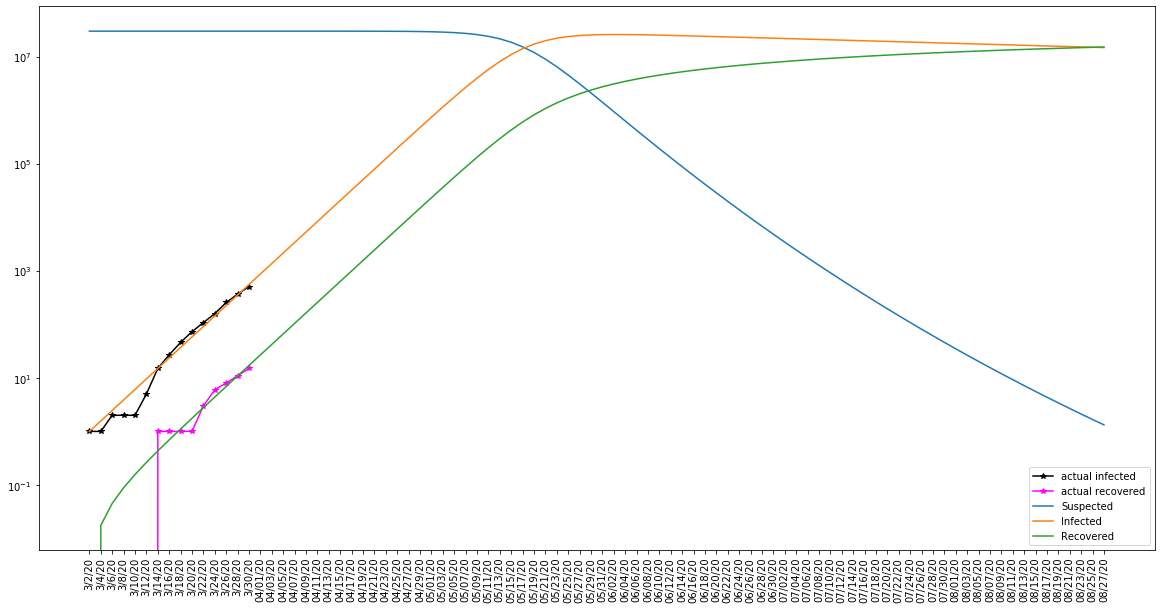

In [24]:
plt.figure(figsize=(20,10))
plt.semilogy(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.semilogy(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.semilogy(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.semilogy(new_index[::2], predictMorocco.y[1,::2], label='Infected')
plt.semilogy(new_index[::2], predictMorocco.y[2,::2], label='Recovered')
plt.xticks(rotation=90)
plt.legend()

# !!!! SEIR model !!!!

In [25]:
def lossSEIR(point, data, recovered, N, s_0, e_0, i_0, r_0):
    #https://github.com/Lewuathe/COVID19-SIR/blob/master/solver.py
    size = len(data)
    alpha, beta, gamma = point
    def SEIR(t, y):
        S = y[0]
        E = y[1]
        I = y[2]
        R = y[3]
        return [-beta*S*I/N, beta*S*I/N - alpha*E, alpha*E - gamma*I, gamma*I]
    solution = solve_ivp(SEIR, [0, size], [s_0,e_0,i_0,r_0],
                         t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[2] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[3] - recovered)**2))
    alpha = 0.5
    #print(l1,l2, alpha * l1 + (1 - alpha) * l2)
    return alpha * l1 + (1 - alpha) * l2

In [26]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

data = dataConfirmedMorocco - dataRecoveredMorocco - dataDeathMorocco
###
s_0 = 3e7-1
e_0 = 0
i_0 = 1
r_0 = 0
###
result = minimize(lossSEIR,
                  [0.1,0.1,0.1],
                  args=(data.astype('float64'), dataRecoveredMorocco.astype('float64'), N, s_0, e_0, i_0, r_0),
                  method='L-BFGS-B',
                  bounds=[(0., 5.), (0., 10.), (0., 5.)])#, bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
alpha, beta, gamma = result.x
print(alpha, beta, gamma, beta/gamma)

2.088840400644308 0.2624169367567316 0.00705142108311462 37.2147590767366


In [27]:
def SEIR(t, y):
    S = y[0]
    E = y[1]
    I = y[2]
    R = y[3]
    return [- beta*S*I/N, beta*S*I/N - alpha*E, alpha*E - gamma*I, gamma*I]

In [28]:
predict_range = nbdays + 120

new_index = extend_index(dataConfirmedMorocco.index, predict_range)
size = len(new_index)

predictMorocco = solve_ivp(SEIR,
                           [0, size],
                           [s_0,e_0,i_0,r_0],
                           t_eval=np.arange(0, size, 1))

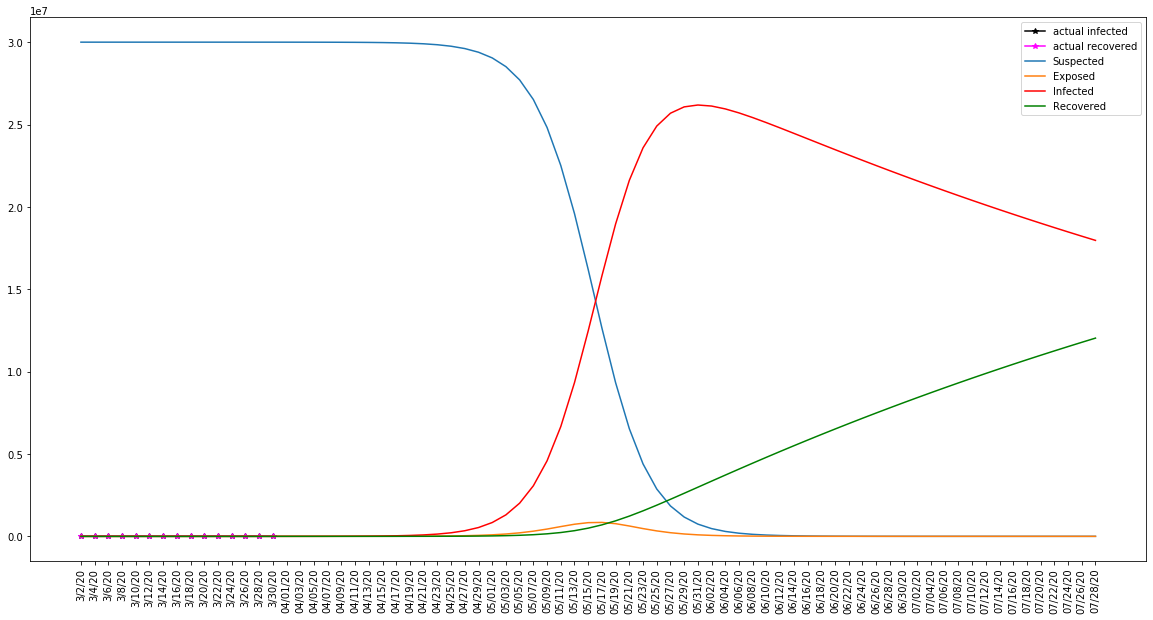

In [29]:
infected_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
recovered_actual = np.concatenate((dataRecoveredMorocco.values, [None] * (size - len(data.values))))

plt.figure(figsize=(20,10))
plt.plot(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.plot(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.plot(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.plot(new_index[::2], predictMorocco.y[1,::2], label='Exposed')
plt.plot(new_index[::2], predictMorocco.y[2,::2], label='Infected', color='red')
plt.plot(new_index[::2], predictMorocco.y[3,::2], label='Recovered', color='green')
plt.xticks(rotation=90)
plt.legend()

log scale

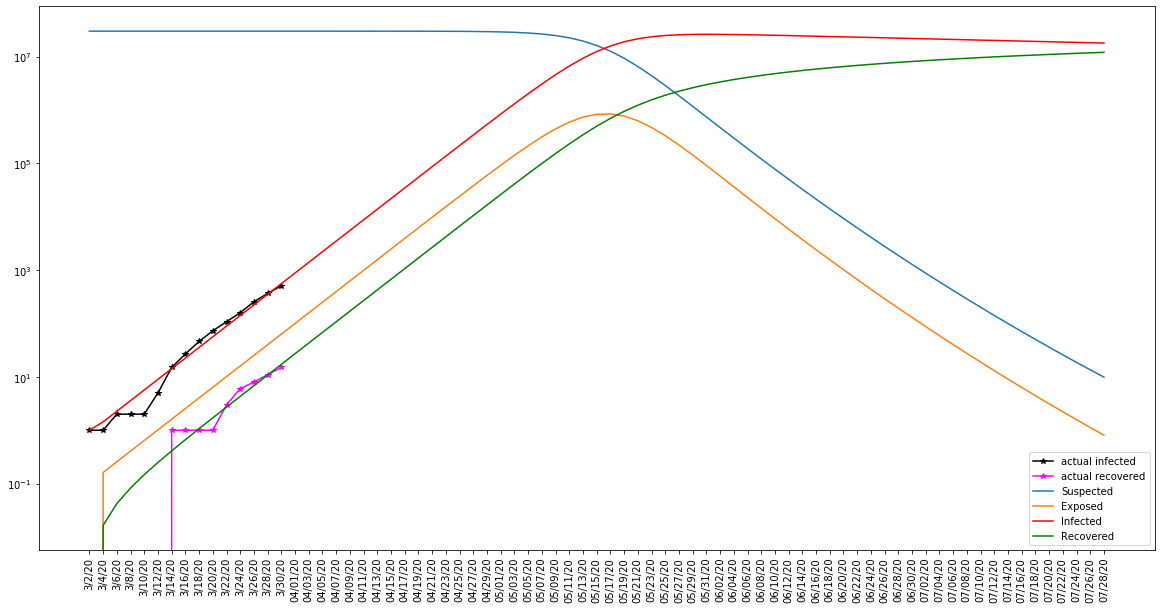

In [31]:
plt.figure(figsize=(20,10))
plt.semilogy(new_index[::2], infected_actual[::2], '*-',color='black', label='actual infected')
plt.semilogy(new_index[::2], recovered_actual[::2], '*-',color='magenta', label='actual recovered')
plt.semilogy(new_index[::2], predictMorocco.y[0,::2], label='Suspected')
plt.semilogy(new_index[::2], predictMorocco.y[1,::2], label='Exposed')
plt.semilogy(new_index[::2], predictMorocco.y[2,::2], label='Infected', color='red')
plt.semilogy(new_index[::2], predictMorocco.y[3,::2], label='Recovered', color='green')
plt.xticks(rotation=90)
plt.legend()

In [30]:
np.max(predictMorocco.y[2,:])

26184420.75390437